## 인공신경망

In [29]:
import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [30]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [31]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [32]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


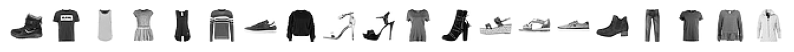

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 20, figsize = (10,10))

for i in range(20):
    axs[i].imshow(train_input[i], cmap = 'Greys')
    axs[i].axis('off')
        
plt.show()

In [34]:
# 사진의 순서이다
print([train_target[i] for i in range(20)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4]


### 로지스틱회귀로 패션아이템 분류하기

In [35]:
import numpy as np

print(np.unique(train_target, return_counts = True))

# 0 ~ 9까지 레이블마다 6000개의 샘플

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [36]:
# 255로 나누어 0 ~ 1 사이의 값으로 정규화
# reshape 함수를 통해 2차원배열을 1차원배열
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [37]:
print(train_scaled.shape)

(60000, 784)


In [40]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 교차검증으로 성능확인
# max_iter = 5 => 반복횟수 5개
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [41]:
# 반복횟수를 늘려도 크게 향상되지않는다
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8313833333333334


### 인공신경망

#### 확률적 경사 하강법을 사용하는 로지스틱 회귀
   - 텐서플로와 케라스

In [51]:
import tensorflow as tf
from tensorflow import keras

### 인공신경망으로 모델 만들기

In [45]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state =42)

In [46]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [47]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [54]:
# 20개의 패션아이템 분류 .. 매개변수 10 => 784개의 픽셀값을 받는다
dense = keras.layers.Dense(20, activation='softmax', input_shape=(784,))

In [57]:
model = keras.Sequential(dense)

### 인공신경망으로 패션아이템 분류하기

In [58]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [59]:
# 5번 반복에 정확도 => 85%의 정답률을 넘음.
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4280 - accuracy: 0.8555


In [60]:
# 위와 비슷한 출력을 보여줌.
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 962us/step - loss: 0.4526 - accuracy: 0.8465


[0.45262545347213745, 0.8464999794960022]

## 심층신경망
- 두개의 층

In [73]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [74]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state = 42)

In [ ]:
# 신경망모델을 2개추가
# 위 인공신경망과 다른점은 입력층과 출력층 사이에 밀집층이 추가된다는 것
# 입력층과 출력층 사이에 있는 모든층을 은닉층이라고함

In [80]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation='softmax')

### 심층신경망 만들기

In [81]:
# 여러개의 층을 추가하기위해 리스트형태로 전달
# 2개 이상의 층을 추가할 수도 있다
model = keras.Sequential([dense1, dense2])

In [82]:
model.summary()
# Model : 모델이름
# 은닉층에서 출력층의 순서대로 나열
# 층이름  클래스  출력크기  모델파라미터개수

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 층을 추가하는 다른방법

In [94]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output') 
], name = '패션 MNIST 모델')

In [95]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


##### add()메서드를 이용한 방법
- 가장 널리 사용하는 방법이다

In [90]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model2.add(keras.layers.Dense(10, activation = 'softmax'))

In [91]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [98]:
# 모델컴파일
model2.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model2.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5672 - accuracy: 0.8079
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4110 - accuracy: 0.8516
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3773 - accuracy: 0.8642
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3536 - accuracy: 0.8733
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3358 - accuracy: 0.8780


In [100]:
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3593 - accuracy: 0.8666


[0.3592749834060669, 0.8665833473205566]

### 렐루 활성화 함수
- 입력이 양수일 경우 마치 활성화함수가 없는 것처럼 입력을 통과 시킨다
- 입력이 음수일 경우 0으로 만든다

In [105]:
model = keras.Sequential()

In [ ]:
# Flatten 클래스는 배치차원을 제외하고 나머지 입력차원을 모두 일렬로 펼치는 역할만 한다
# 입력에 곱해지는 가중치나 절편은 없다

In [106]:
# 입력층의 이미지를 1차원배열형태로 만들어주기위해 케라스에서 제공하는 전용 입력층
model.add(keras.layers.Flatten(input_shape = (28,28)))
# relu: 은닉층에 사용하는 활성화 함수로써 sigmoid 함수보다 성능이 더 좋은 것으로 알려져 있다.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [107]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [111]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)

In [112]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3054 - accuracy: 0.8914
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2933 - accuracy: 0.8957
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2870 - accuracy: 0.8980
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2787 - accuracy: 0.9009
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2690 - accuracy: 0.9042


In [113]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4034 - accuracy: 0.8723


[0.40344852209091187, 0.8723333477973938]

### 옵티마이저
- Adam을 가장 많이 사용한다

In [114]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [115]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [117]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [118]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [119]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [120]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [121]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               78500     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5232 - accuracy: 0.8179
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3918 - accuracy: 0.8609
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.8811
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3102 - accuracy: 0.8867


In [123]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3450 - accuracy: 0.8751


[0.3449585437774658, 0.875083327293396]

## 신경망 모델 훈련

### 손실곡선

In [124]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target)=\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target=train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [125]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

# a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것임.

In [126]:
model=model_fn()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)
# verbose 0은 훈련과정막대 안나오게하는 매개변수임.

In [128]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


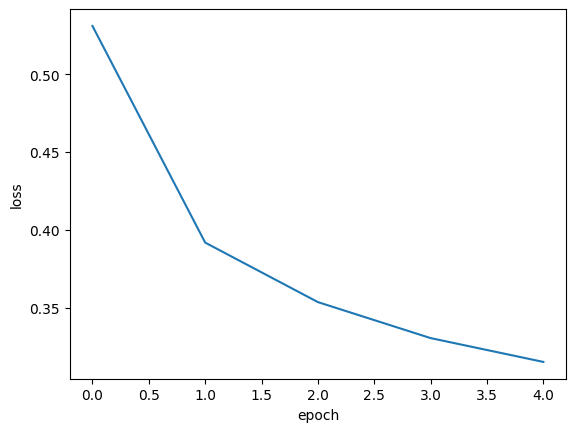

In [130]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 0 ~ 4 까지의 에포크가 x축에 표현된다
# y축은 계산된 손실값임

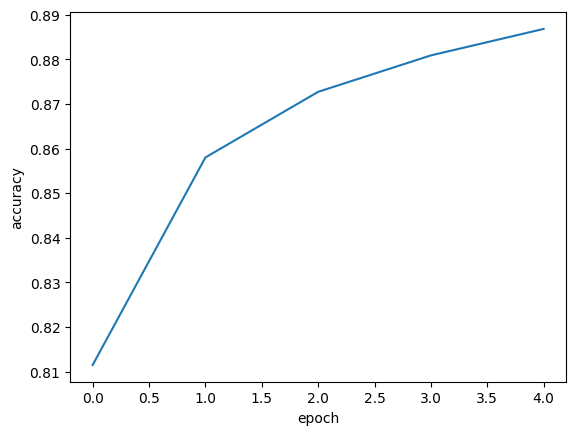

In [132]:
plt.plot(history.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 에포크마다 손실이 감소하고 정확도가 향상됨.

In [133]:
# 에포크횟수를 20으로 늘려 모델을 훈련
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

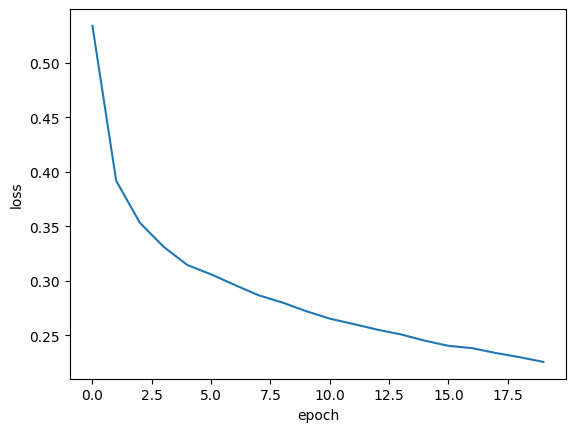

In [134]:
plt.plot(history.history['loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증손실
- 과대/과소적합을 판단하기위한 시각화
- 위 손실곡선처럼 훈련세트의 손실만 그려서는 안된다 그러므로 손실을 사용하여  과대/과소적합을 다루어야함

In [136]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 훈련데이터와 시험데이터셋의 학습 및 평가결과를 동시에 비교하기위해
# validation_data 옵션에 시험데이터의 정보를 입력
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [137]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


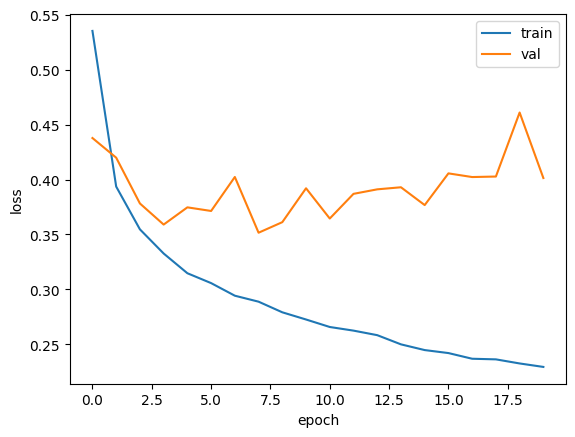

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

# 초기에 검증손실이 감소하다가 5번째 에포크만에 다시 상승하기 시작함.
# 훈련손실은 꾸준히 감소하기때문에 전형적인 과대적합모델이 만들어짐.

##### 기본 RMSprop대신 Adam을 선택하여 학습

In [139]:
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history=model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

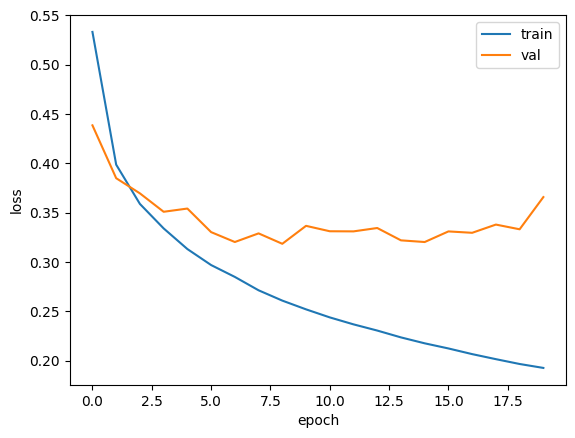

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

# 과대적합이 훨씬 줄어드는것을 볼 수 있음.
# 검증손실 그래프에 여전히 요동이 남아있지만 10번째 에포크까지 전반적인 감소추세가 이어짐.

# Adam 옵티마이저가 이 데이터셋에 잘맞는다는걸을 보여준다

### 드롭아웃
- 은닉층의 30% 랜덤하게 사용하지않게하여 과대적합을 제어한다.
- 케라스에서는 Dropout층을 제어하고자하는 층 다음에 삽입시킨다.

In [141]:
# 30% 정도 드롭아웃
model=model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


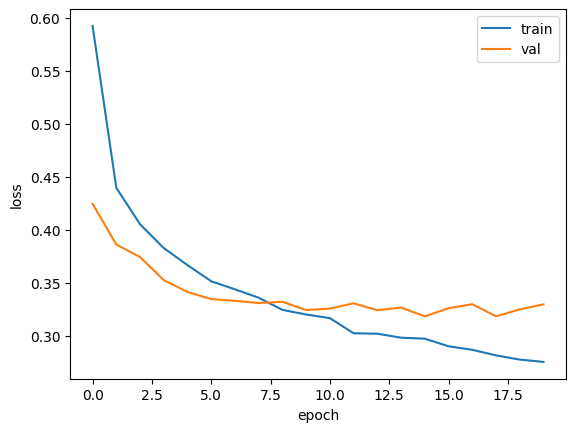

In [142]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

# 과대적합이 확실히 줄은것을 볼 수 있다
# 열번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승되지않고 유지됨
# 이 모델은 20번의 에포크동안 훈련했기때문에 결국 다소 과대적합이되어있다
# 그렇다면 과대적합되지않은 모델을 얻기위해 에포크 횟수를 10으로 하고 다시 훈련해보아야 할듯함

## 모델 저장과 복원

In [144]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history=model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [145]:
model.save_weights('model-weights.h5')

In [146]:
model.save('model-whole.h5')

### 개별 예측값 검증

In [148]:
import numpy as np

model.predict(val_scaled).shape

375/375 [==============================] - 1s 1ms/step


(12000, 10)

In [149]:
model.predict(val_scaled)[0]

375/375 [==============================] - 0s 1ms/step


array([2.0286919e-09, 4.8237391e-15, 3.5750101e-11, 6.1970156e-12,
       3.6054555e-11, 3.1837735e-05, 6.1547059e-11, 4.7225390e-07,
       9.9996769e-01, 1.6797246e-10], dtype=float32)

In [150]:
# argmax는 배열에 있는 값 중 가장 큰 값을 포함하고 있는 인덱스를 반환
np.argmax(model.predict(val_scaled)[0])
# 8은 메뉴얼에서 정의된 8번째 인덱스 가방을 의미한다.

375/375 [==============================] - 0s 1ms/step


8

### argmax의 이해
- 가장 큰값의 인덱스를 가져온다

In [151]:
val_labels=np.argmax(model.predict(val_scaled), axis=1)

print(np.mean(val_labels==val_target))

375/375 [==============================] - 0s 1ms/step
0.8759166666666667


In [152]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3419 - accuracy: 0.8759


[0.34186962246894836, 0.8759166598320007]

## 콜백
- 훈련 과정 중간에 특정 작업을 수행할 수 있게 하는 객체이다
- 주로 조기 종료의 용도로 사용한다

In [159]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',
                                             save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [160]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3118 - accuracy: 0.8878


[0.3117927014827728, 0.8878333568572998]

#### 조기종료

In [161]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                               save_best_only=True)

# patience : 모델성능이 향상되지않는 (손실값이 줄어들지않는)것을 지속시킬 최대 에포크
# restore_best_weights : EarlyStop시 최적의 가중치 조건으로 복원
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [162]:
print(early_stopping_cb.stopped_epoch)

9


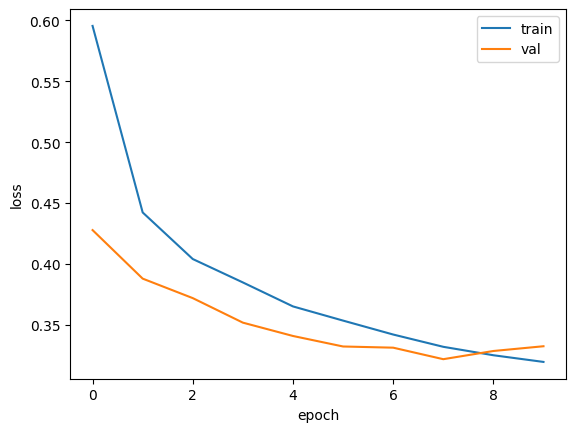

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

# 열한번째 에포크에서 가장 낮은 손실을 기록했고 
# 열세번째 에포크에서 훈련이 중지된걸 확인할 수 있음.

# 조기종료기법을 사용하면 안심하고 에포크 횟수를 크게 지정해도 괜찮다

In [164]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8838


[0.32165610790252686, 0.8837500214576721]